Gaussian Noise Application

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import math

In [4]:
img = cv2.imread("/content/png-transparent-hummingbird-free-buckle-hummingbird-free-logo-design-template-computer-fauna-thumbnail.png", 0)
print(img.shape)
size = img.shape[0] * img.shape[1]
size1=img.shape
print(size, size1)

(360, 360)
129600 (360, 360)


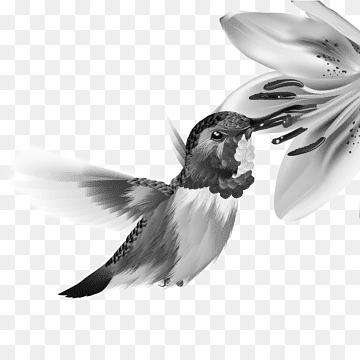

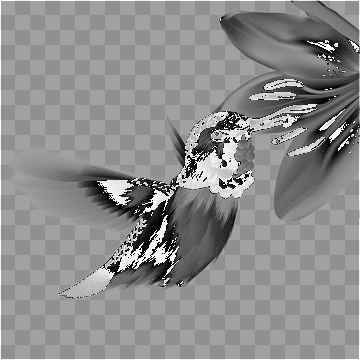

In [76]:
#Gaussian Noise Application
img_gau = img.copy()
mean=0
std=0

for r in range(img.shape[0]):
  for c in range(img.shape[1]):
    mean+=img[r,c]
mean=mean/size

for r in range(img.shape[0]):
  for c in range(img.shape[1]):
    std+=((img[r,c]-mean)**2)
std=std/size

sz=int(np.round(size/9))
noise = np.random.normal(mean,std,size=sz)
i=0
for r in range(1,img.shape[0]-1):
  for c in range(1,img.shape[1]-1):
    img_gau[r,c]=img[r,c] + noise[i]
    if(i<=len(noise)):
      i = -1
    i+=1

#img_gau=noise
cv2_imshow(img)
print(" ")
cv2_imshow(img_gau)

Gaussian Noise Filtering

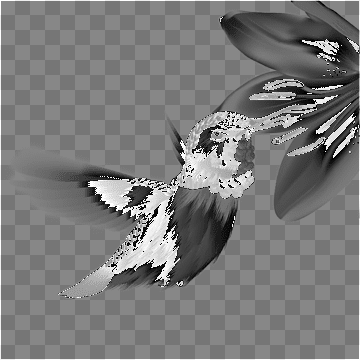

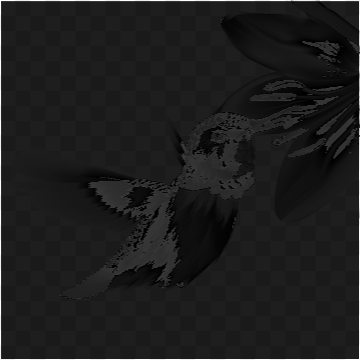

In [71]:
#Mean or Average Algorithm
img_Amean = img_gau.copy()
r=1
s=0
while r < img_gau.shape[0]-1:
  c=1
  while c < img_gau.shape[1]-1:
    i=r-1
    j=c-1
    while i<r+1:
      while j<c+1:
        s+= img_gau[i, j]
        j+=1
      i+=1
    img_Amean[r,c]=s/9
    s=0
    c+=1
  r+=1

cv2_imshow(img_gau)
print(" ")
cv2_imshow(img_Amean)

<ipython-input-72-f62626742bbb>:16: RuntimeWarning: overflow encountered in long_scalars
  s*= img_gau[r+1, c+1]
<ipython-input-72-f62626742bbb>:17: RuntimeWarning: invalid value encountered in power
  s=s**(1/9)
<ipython-input-72-f62626742bbb>:15: RuntimeWarning: overflow encountered in long_scalars
  s*= img_gau[r+1, c]


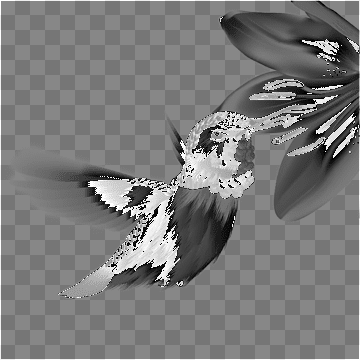

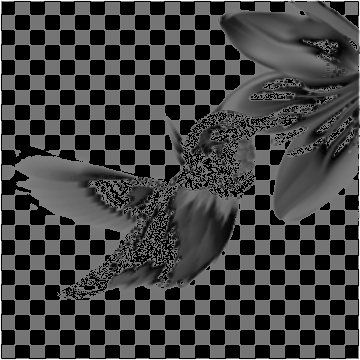

In [72]:
#Geometric Mean
img_Gmean = img_gau.copy()
r=1
s=1
while r < img_gau.shape[0]-1:
  c=1
  while c < img_gau.shape[1]-1:
    s*= img_gau[r-1, c-1]
    s*= img_gau[r-1, c]
    s*= img_gau[r-1, c+1]
    s*= img_gau[r, c-1]
    s*= img_gau[r, c]
    s*= img_gau[r, c+1]
    s*= img_gau[r+1, c-1]
    s*= img_gau[r+1, c]
    s*= img_gau[r+1, c+1]
    s=s**(1/9)
    img_Gmean[r,c]=s
    s=1
    c+=1
  r+=1

cv2_imshow(img_gau)
print(" ")
cv2_imshow(img_Gmean)

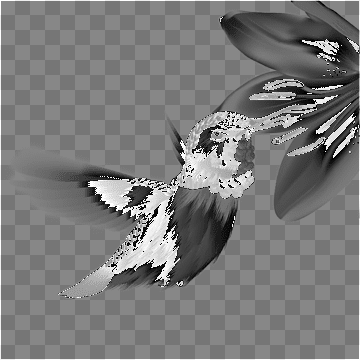

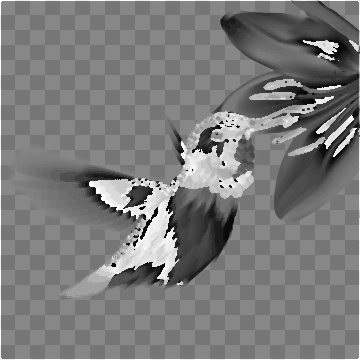

In [73]:
#Median Algorithm
img_med = img_gau.copy()
r=1
m=[]
while r < img_gau.shape[0]-1:
  c=1
  while c < img_gau.shape[1]-1:
    m.append(img_gau[r-1,c-1])
    m.append(img_gau[r-1,c])
    m.append(img_gau[r-1,c+1])
    m.append(img_gau[r,c-1])
    m.append(img_gau[r,c])
    m.append(img_gau[r,c+1])
    m.append(img_gau[r+1,c-1])
    m.append(img_gau[r+1,c])
    m.append(img_gau[r+1,c+1])
    m.sort()
    #print(m)
    img_med[r,c]=m[4]
    m.clear()
   # print(m)
    c+=1
  r+=1
cv2_imshow(img_gau)
print(" ")
cv2_imshow(img_med)

<ipython-input-74-3f514e233e11>:12: RuntimeWarning: overflow encountered in ubyte_scalars
  s= (max+min)*(1/2)


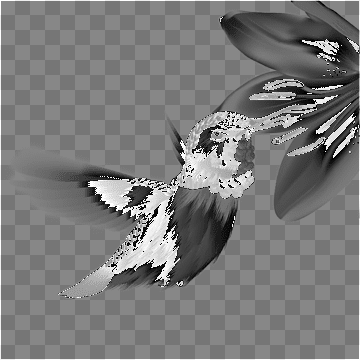

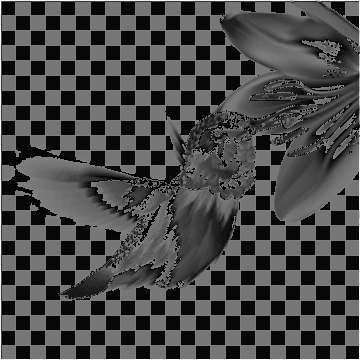

In [74]:
#Midpoint Algorithm
img_mid = img_gau.copy()
temp=[]
s=0
for r in range(1,img_gau.shape[0]-1):
  for c in range(1,img_gau.shape[1]-1):
    for i in range(r-1,r+1):
      for j in range(c-1,c+1):
        temp.append(img_gau[i,j])
    max=np.max(temp)
    min=np.min(temp)
    s= (max+min)*(1/2)
    img_mid[r,c]=s
    temp.clear()
cv2_imshow(img_gau)
print(" ")
cv2_imshow(img_mid)

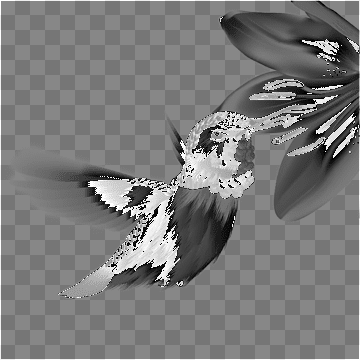

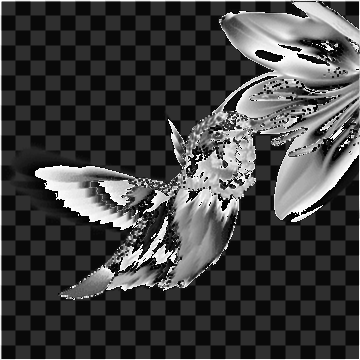

In [75]:
#Harmonic Mean Filter
img_harc = img_gau.copy()
sum=0
val=0
for r in range (1,img_gau.shape[0]-1):
  for c in range(1,img_gau.shape[1]-1):
    for i in range (r-1,r+1):
      for j in range(c-1,c+1):
        sum+=1/img_gau[i,j]
    val=(9/sum)
    img_harc[r,c]=val
    sum=0
cv2_imshow(img_gau)
print(" ")
cv2_imshow(img_harc)